# Importing Packages

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope

In [2]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
from customMetrics import dice_loss, dice_coef, iou

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Loading Utils Functions

In [5]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [6]:
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    # x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.float32)
    return ori_x, x

In [7]:
def read_mask(path):
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  ## (128, 128)
    # x = cv2.resize(x, (W, H))
    ori_x = x
    x = x/255.0
    x = x.astype(np.int32)
    return ori_x, x

In [8]:
def load_data(path):
    x = sorted(glob(os.path.join(path, "image", "*.jpg")))
    y = sorted(glob(os.path.join(path, "gt", "*.jpg")))
    return x, y

In [9]:
def save_results(ori_x, ori_y, y_pred, save_image_path):
    line = np.ones((H, 10, 3)) * 255

    ori_y = np.expand_dims(ori_y, axis=-1)
    ori_y = np.concatenate([ori_y, ori_y, ori_y], axis=-1)

    y_pred = np.expand_dims(y_pred, axis=-1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1) * 255

    cat_images = np.concatenate([ori_x, line, ori_y, line, y_pred], axis=1)
    
    cv2.imwrite(save_image_path, cat_images)

In [46]:
cv2.imwrite("Black.png", black)

True

In [10]:
def get_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sen = tp/(tp+fn)
    spe = tn/(tn+fp) 
    return sen, spe

# Setting The Environment

In [12]:
H = 128
W = 128

In [11]:
""" Save the results in this folder """
create_dir("results128_32")

In [13]:
""" Load the model """
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("files128/model128_32.h5")


In [52]:
""" Load the dataset """
dataset_path = os.path.join("test", "train_test")
test_x, test_y = load_data(dataset_path)

In [15]:
from matplotlib import pyplot as plt

In [40]:
black = np.zeros((128, 128))

In [53]:
""" Make the prediction and calculate the metrics values """
SCORE = []

for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
    
    """ Extracting name """
    name = x.split("\\")[-1].split(".")[0]
    print(name)
    """ Read the image and mask """
    ori_x, x = read_image(x)
    ori_y, y = read_mask(y)

    """ Prediction """
    y_pred = model.predict(np.expand_dims(x, axis=0))[0]
    y_pred = y_pred > 0.5
    y_pred = y_pred.astype(np.int32)
    y_pred = np.squeeze(y_pred, axis=-1)
    print(y.shape)

    """ Saving the images """
    save_image_path = f"results128_32\\{name}Train.png"
    print(save_image_path)
    row.append(y_pred)
    save_results(ori_x, ori_y, y_pred, save_image_path)

    """ Flatten the array """
    y = y.flatten()
    y_pred = y_pred.flatten()

    """ Calculate the metrics """
    acc_value = accuracy_score(y, y_pred)
    f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary")
    jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary")
    recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary")
    precision_value = precision_score(y, y_pred, labels=[0, 1], average="binary")
    
    cm = confusion_matrix(y, y_pred)
    sensitivity, specificity = get_metrics(cm)
    
    SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value, sensitivity, specificity])

  5%|▍         | 1/21 [00:00<00:02,  9.43it/s]

21_training_0_01
(128, 128)
results128_32\21_training_0_01Train.png
21_training_0_02
(128, 128)
results128_32\21_training_0_02Train.png
21_training_0_03


 14%|█▍        | 3/21 [00:00<00:01, 10.71it/s]

(128, 128)
results128_32\21_training_0_03Train.png
21_training_0_10
(128, 128)
results128_32\21_training_0_10Train.png
21_training_0_11


 33%|███▎      | 7/21 [00:00<00:01, 10.25it/s]

(128, 128)
results128_32\21_training_0_11Train.png
21_training_0_12
(128, 128)
results128_32\21_training_0_12Train.png
21_training_0_13
(128, 128)
results128_32\21_training_0_13Train.png
21_training_0_14
(128, 128)
results128_32\21_training_0_14Train.png
21_training_0_20
(128, 128)
results128_32\21_training_0_20Train.png


 52%|█████▏    | 11/21 [00:01<00:01, 10.00it/s]

21_training_0_21
(128, 128)
results128_32\21_training_0_21Train.png
21_training_0_22
(128, 128)
results128_32\21_training_0_22Train.png
21_training_0_23


 62%|██████▏   | 13/21 [00:01<00:00,  9.63it/s]

(128, 128)
results128_32\21_training_0_23Train.png
21_training_0_24
(128, 128)
results128_32\21_training_0_24Train.png
21_training_0_30


 71%|███████▏  | 15/21 [00:01<00:00, 10.03it/s]

(128, 128)
results128_32\21_training_0_30Train.png
21_training_0_31
(128, 128)
results128_32\21_training_0_31Train.png
21_training_0_32
(128, 128)
results128_32\21_training_0_32Train.png


 81%|████████  | 17/21 [00:01<00:00,  9.98it/s]

21_training_0_33
(128, 128)
results128_32\21_training_0_33Train.png
21_training_0_34
(128, 128)
results128_32\21_training_0_34Train.png
21_training_0_41


 90%|█████████ | 19/21 [00:01<00:00, 10.18it/s]

(128, 128)
results128_32\21_training_0_41Train.png
21_training_0_42
(128, 128)
results128_32\21_training_0_42Train.png
21_training_0_43
(128, 128)
results128_32\21_training_0_43Train.png


100%|██████████| 21/21 [00:02<00:00,  9.94it/s]


In [54]:
SCORE

[['21_training_0_01',
  0.98968505859375,
  0.7616361071932299,
  0.6150341685649203,
  0.9574468085106383,
  0.6323185011709602,
  0.9574468085106383,
  0.9902496584275245],
 ['21_training_0_02',
  0.975341796875,
  0.7770419426048565,
  0.6353790613718412,
  1.0,
  0.6353790613718412,
  1.0,
  0.974234693877551],
 ['21_training_0_03',
  0.9913330078125,
  0.793002915451895,
  0.6570048309178744,
  0.9890909090909091,
  0.6618004866180048,
  0.9890909090909091,
  0.991371283133652],
 ['21_training_0_10',
  0.98321533203125,
  0.7769667477696675,
  0.6352785145888594,
  0.9979166666666667,
  0.6361221779548473,
  0.9979166666666667,
  0.982771629778672],
 ['21_training_0_11',
  0.9222412109375,
  0.7837746096401901,
  0.6444320401897851,
  0.9991345737775854,
  0.644791957553756,
  0.9991345737775854,
  0.9096141547644425],
 ['21_training_0_12',
  0.95562744140625,
  0.7805614246906126,
  0.6400990099009901,
  0.9976851851851852,
  0.6410510659395141,
  0.9976851851851852,
  0.95201484

In [56]:
score = [s[1:] for s in SCORE]
score = np.mean(score, axis=0)
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")
print(f"Sensitivity: {score[5]:0.5f}")
print(f"Specificity: {score[6]:0.5f}")



Accuracy: 0.97390
F1: 0.77503
Jaccard: 0.63292
Recall: 0.97854
Precision: 0.64245
Sensitivity: 0.97854
Specificity: 0.97216


In [57]:
""" Saving """
df = pd.DataFrame(SCORE, columns=["Image", "Acc", "F1", "Jaccard", "Recall", "Precision", "Sensitivity", "Specificity"])
df

,Image,Acc,F1,Jaccard,Recall,Precision,Sensitivity,Specificity
0,21_training_0_01,0.989685,0.761636,0.615034,0.957447,0.632319,0.957447,0.990250
1,21_training_0_02,0.975342,0.777042,0.635379,1.000000,0.635379,1.000000,0.974235
2,21_training_0_03,0.991333,0.793003,0.657005,0.989091,0.661800,0.989091,0.991371
3,21_training_0_10,0.983215,0.776967,0.635279,0.997917,0.636122,0.997917,0.982772
4,21_training_0_11,0.922241,0.783775,0.644432,0.999135,0.644792,0.999135,0.909614
5,21_training_0_12,0.955627,0.780561,0.640099,0.997685,0.641051,0.997685,0.952015
6,21_training_0_13,0.967834,0.763995,0.618116,0.997661,0.619013,0.997661,0.966192
7,21_training_0_14,0.990601,0.751613,0.602067,0.913725,0.638356,0.913725,0.991816
8,21_training_0_20,0.943909,0.787711,0.649771,0.998828,0.650267,0.998828,0.937521
9,21_training_0_21,0.975159,0.779881,0.639184,1.000000,0.639184,1.000000,0.974015


In [36]:
# df.to_csv("files/score.csv")


In [21]:
import seaborn as sns

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

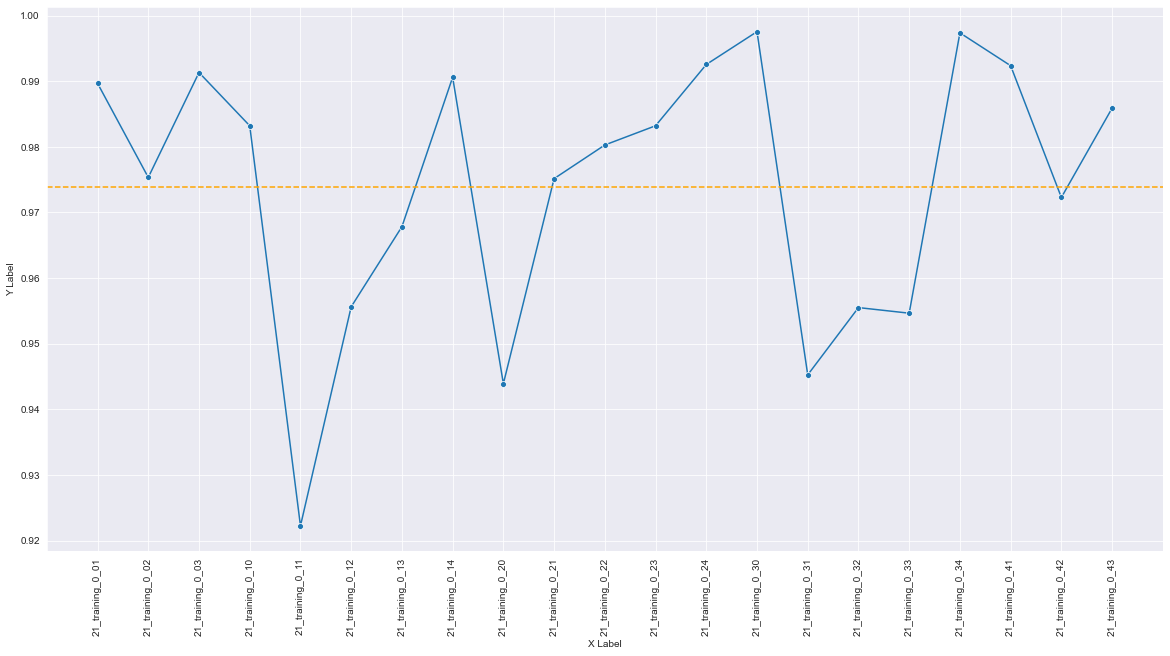

In [58]:
plt.figure(figsize=(20, 10))
sns.set_style("darkgrid")
ax = sns.lineplot(data=df, x="Image", y="Acc", marker = "o")
ax.axhline(df["Acc"].mean(), color="orange", linestyle="--")
ax.set(xlabel="X Label", ylabel = "Y Label")
plt.setp(ax.get_xticklabels(), rotation=90)
